# ITP-ML Titanic

Het Jupyter notebook voor de kaggle competition __Titanic__:  
https://www.kaggle.com/c/titanic

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

%matplotlib inline

## Load train data

In [3]:
df = pd.read_csv("./data/train.csv")

In [4]:
df.shape

(891, 12)

In [5]:
df.head(5)  # Show top 5 rows in dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = df.drop(["Cabin", "Name", "Ticket"], axis=1)

## Check for null values

In [7]:
df.isnull().values.any()

True

In [8]:
dna = df.dropna()

In [9]:
dna.shape

(712, 9)

In [10]:
dna.isnull().values.any()

False

In [11]:
df = dna

## Check Data Types

In [12]:
df.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
6,7,0,1,male,54.0,0,0,51.8625,S


Change Sex: male = 1, female = 0  
Change Embarked: C = 0, S = 1, Q = 2

In [13]:
sex_map = {"male" : 1, "female" : 0}
embarked_map = {"C": 0, "S": 1, "Q": 2}

In [14]:
df["Sex"] = df["Sex"].map(sex_map)
df["Embarked"] = df["Embarked"].map(embarked_map)

In [15]:
df.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1
6,7,0,1,1,54.0,0,0,51.8625,1


## Check for correlation

In [16]:
def plot_corr(df, size=7):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

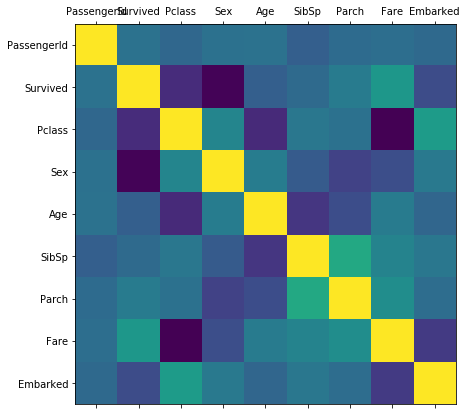

In [17]:
plot_corr(df)

_Fare_ and _Pclass_ seem negatively correlated. Enough to delete one of these columns?

In [18]:
df["Pclass"].corr(df["Fare"])

-0.55289322064576008

In [19]:
dead = len(df.loc[df["Survived"] == 1])
alive = len(df.loc[df["Survived"] == 0])
print("Number of fatalities: " + str(dead) + " (" + str(100 * dead/(dead+alive)) + " %)")
print("Number of survivors: " + str(alive) + " (" + str(100 * alive/(dead+alive)) + " %)")

Number of fatalities: 288 (40.449438202247194 %)
Number of survivors: 424 (59.550561797752806 %)


## Data ready!

In [20]:
X = df.values
Y = df['Survived'].values

X = np.delete(X,1,axis=1)
dfns =

In [21]:
X.shape

(712, 8)

In [22]:
Y.shape

(712,)

In [23]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
clf.score(X,Y)

0.8595505617977528

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

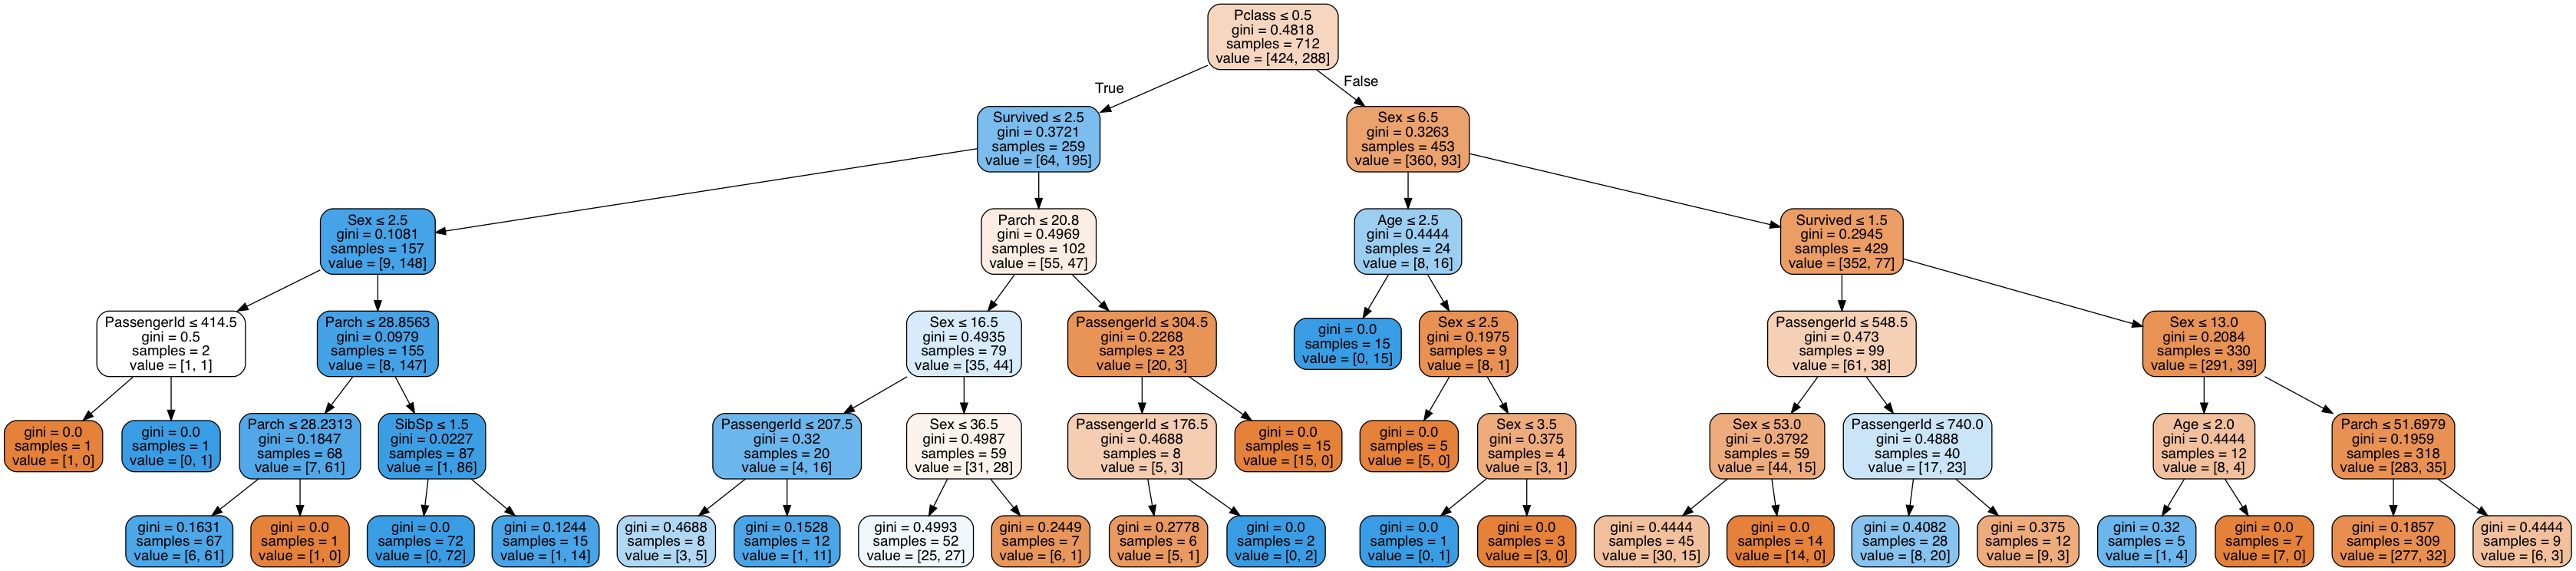

In [35]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = df.columns,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


In [30]:
df.

<bound method NDFrame.keys of      PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare  \
0              1         0       3    1  22.0      1      0    7.2500   
1              2         1       1    0  38.0      1      0   71.2833   
2              3         1       3    0  26.0      0      0    7.9250   
3              4         1       1    0  35.0      1      0   53.1000   
4              5         0       3    1  35.0      0      0    8.0500   
6              7         0       1    1  54.0      0      0   51.8625   
7              8         0       3    1   2.0      3      1   21.0750   
8              9         1       3    0  27.0      0      2   11.1333   
9             10         1       2    0  14.0      1      0   30.0708   
10            11         1       3    0   4.0      1      1   16.7000   
11            12         1       1    0  58.0      0      0   26.5500   
12            13         0       3    1  20.0      0      0    8.0500   
13            14     

AttributeError: 'DataFrame' object has no attribute 'feature_names'